## Setup

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model


## Part 1 - linearly separable data

Error on test data: 0.0
Error on train data: 0.0


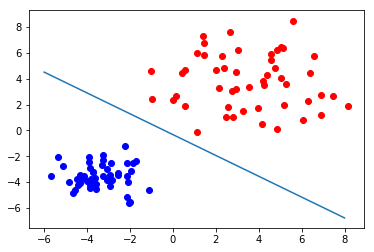

In [5]:
X=np.loadtxt("data/linsep-traindata.csv", delimiter=',')
y=np.loadtxt("data/linsep-trainclass.csv", delimiter=',')
n=len(y)

shuffle_ind=np.arange(n)
np.random.shuffle(shuffle_ind)

X=X[shuffle_ind]
y=y[shuffle_ind]

logreg = linear_model.LogisticRegression()

error_test=0
cross_val_folds=10
for i in range(cross_val_folds):
    train_mask=np.ones(n, dtype=bool)    
    train_mask[int(i*n/cross_val_folds):int((i+1)*n/cross_val_folds)]=False
    
    X_train=X[train_mask]
    y_train=y[train_mask]
    X_test=X[train_mask==False]
    y_test=y[train_mask==False]
    logreg.fit(X_train, y_train)
    pred=logreg.predict(X_test)
    
    error_test+=np.sum(pred!=y_test)  
error_test/=n   
print("Error on test data:",error_test)

logreg.fit(X, y)

pred_train=logreg.predict(X)
error_train=np.average(pred_train!=y)
print("Error on train data:",error_train)

decision_boundary_x=np.asarray([-6,8])
decision_boundary_y=(-logreg.intercept_-logreg.coef_[0,0]*decision_boundary_x)/logreg.coef_[0,1]

plt.scatter(X[y==1,0], X[y==1,1], c='b')
plt.scatter(X[y==-1,0], X[y==-1,1], c='r')
plt.plot(decision_boundary_x, decision_boundary_y)
plt.show()    


## Part 2 - nonseparable data

Error on test data: 0.05
Error on train data: 0.03


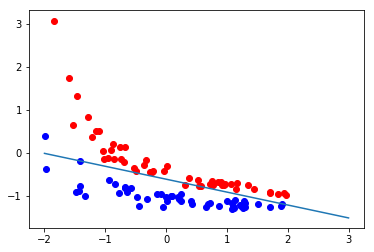

In [9]:
X=np.loadtxt("data/nonlinsep-traindata.csv", delimiter=',')
y=np.loadtxt("data/nonlinsep-trainclass.csv", delimiter=',')
n=len(y)


shuffle_ind=np.arange(n)
np.random.shuffle(shuffle_ind)

X=X[shuffle_ind]
y=y[shuffle_ind]

logreg = linear_model.LogisticRegression()

error_test=0
cross_val_folds=10
for i in range(cross_val_folds):
    train_mask=np.ones(n, dtype=bool)    
    train_mask[int(i*n/cross_val_folds):int((i+1)*n/cross_val_folds)]=False
    
    X_train=X[train_mask]
    y_train=y[train_mask]
    X_test=X[train_mask==False]
    y_test=y[train_mask==False]
    logreg.fit(X_train, y_train)
    pred=logreg.predict(X_test)
    
    error_test+=np.sum(pred!=y_test)  
  
error_test/=n
print("Error on test data:",error_test)

logreg.fit(X, y)

pred_train=logreg.predict(X)
error_train=np.average(pred_train!=y)
print("Error on train data:",error_train)

decision_boundary_x=np.asarray([-2,3])
decision_boundary_y=(-logreg.intercept_-logreg.coef_[0,0]*decision_boundary_x)/logreg.coef_[0,1]

plt.scatter(X[y==1,0], X[y==1,1], c='b')
plt.scatter(X[y==-1,0], X[y==-1,1], c='r')
plt.plot(decision_boundary_x, decision_boundary_y)
plt.show()  

## Discussion
Both datasets are 'easy' in a sense that they are lowdimensional, and first dataset is linearly separable.